In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url ="https://s3.us-east-2.amazonaws.com/capstone311-bucket/FDNY.csv"

In [4]:
# df = pd.read_csv(url, iterator=True, chunksize=1000) 

In [17]:
first_chunk = df.get_chunk(87)

## Now let's try using NYC API to get the data, just from 2018 most recent

In [ ]:
# query directly to soda 
#https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$where=created_date > '2018-08-01T13:00:00.000'&$limit=1000

In [ ]:
## Writing a SODA query specifically for what we need to push into s3 agency                    95500 non-null object
# in EC2 curl "https://data.cityofnewyork.us/api/views/76xm-jjuj/rows.csv?accessType=DOWNLOAD" | aws s3 cp - s3://capstone311-bucket 
#https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$select=borough,closed_date,community_board,complaint_type,created_date,descriptor,open_data_channel_type,status,latitude,longitude&$where=created_date>'2017-01-01T13:00:00.000'           

In [ ]:
https://nycopendata.socrata.com/api/views/erm2-nwe9/rows.csv?accessType=DOWNLOAD

In [1]:
import os
import pandas as pd
from sodapy import Socrata
import json

In [2]:
# do this later sodapy_token = os.environ.get("SODAPY_APPTOKEN")# API key (unlimited)
sodapy_token = 'tvPeTjPatFwjuelfpMNb0G8WH'
sodapy_domain = 'data.cityofnewyork.us'

In [3]:
client = Socrata(sodapy_domain, sodapy_token)

In [4]:
database_311 = "fhrw-4uyv"

In [5]:
# query = "city = 'BRONX'"
query = "created_date > '2017-01-01T13:00:00.000'"

In [6]:
results = client.get(database_311, where=query
                     , limit=500000) #never ever do above 100k again .. LIES DO IT!

ConnectionError: HTTPSConnectionPool(host='data.cityofnewyork.us', port=443): Read timed out.

In [7]:
df = pd.DataFrame.from_records(results)

In [8]:
df.to_csv('../data/500k_EDA_311.csv')

In [4]:
ls

EDA_311_Sub_set.ipynb  EDA_Energy_Consumption_Data.ipynb


In [5]:
api_df = pd.read_csv('../data/100k_EDA_311.csv')

/home/pipingkid/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (20,23,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
 #for pandas
DROP = ['bridge_highway_direction','bridge_highway_name',
       'bridge_highway_segment', 'landmark','road_ramp']
#for SoQL queries
SELECT = "" 

### Early practice with folieum

In [6]:
import folium

In [7]:
rodent_complaints = api_df[api_df['complaint_type'] == 'Rodent']

In [8]:
rodent_locations = rodent_complaints[['latitude', 'longitude']]

In [9]:
rodent_locations = rodent_locations.apply(pd.to_numeric, errors='ignore')

In [10]:
rodent_locations.dropna(inplace=True)

In [11]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for index, row in rodent_locations.iterrows():
    color="#E37222" # tangerine
    folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"])).add_to(folium_map)

In [12]:
folium_map

In [11]:
# api_df.info()
##mostly highway litter issues for bridge_* columns
# api_df['descriptor'][api_df['bridge_highway_direction'].notnull()]

## interesting- location data maybe since are landmarks..but really not that many
#api_df[api_df['landmark'].notnull()].count()

##Two non-null out of 100k...
#api_df[api_df['vehicle_type'].notnull()]

#api_df[api_df['road_ramp'].notnull()]

## Neighborhoods - probably better way to define
# api_df['city'].value_counts

## Drop unneeded columns
api_df.drop(DROP, axis=1,inplace=True)

In [12]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
address_type                      97475 non-null object
agency                            100000 non-null object
agency_name                       100000 non-null object
bbl                               81871 non-null object
borough                           100000 non-null object
city                              97691 non-null object
closed_date                       96133 non-null object
community_board                   100000 non-null object
complaint_type                    100000 non-null object
created_date                      100000 non-null object
cross_street_1                    61255 non-null object
cross_street_2                    60971 non-null object
descriptor                        99362 non-null object
due_date                          48377 non-null object
facility_type                     99942 non-null object
incident_address                  85815 non-

In [76]:
##Can we drop agency vs agency_name? 
# api_df['agency'].nunique() # 22
# api_df['agency'].value_counts()
# api_df['agency_name'].nunique() # 145
# print(api_df['agency_name'].value_counts())

## Interesting- might be able to get more specific for sub agency level.
## Consider combinging both columns

In [13]:
## Null closed dates. These are pending assignment. Drops
# api_df[api_df['closed_date'].isnull()]
api_df.dropna(subset=['closed_date'],inplace=True)

In [15]:
# Let's get some general data going. Drops below are only for easier reading sake
DROP2 = [ 'agency_name','city','cross_street_1', 'cross_street_2',
          'facility_type', 'incident_address','intersection_street_1', 'intersection_street_2', 
         'location', 'location_type', 'park_borough', 'park_facility_name', 'street_name','taxi_company_borough', 'taxi_pick_up_location', 'unique_key',
       'x_coordinate_state_plane', 'y_coordinate_state_plane','due_date','bbl']


In [16]:
api_df.drop(DROP2,axis=1, inplace=True)

In [80]:
#may end up needing these again
DROP3 = ['address_type','incident_zip','resolution_action_updated_date','resolution_description','longitude','latitude']

In [81]:
api_df.drop(DROP3,axis=1, inplace=True)

In [17]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96133 entries, 0 to 99999
Data columns (total 15 columns):
address_type                      93826 non-null object
agency                            96133 non-null object
borough                           96133 non-null object
closed_date                       96133 non-null object
community_board                   96133 non-null object
complaint_type                    96133 non-null object
created_date                      96133 non-null object
descriptor                        95500 non-null object
incident_zip                      94005 non-null object
latitude                          91203 non-null object
longitude                         91203 non-null object
open_data_channel_type            96133 non-null object
resolution_action_updated_date    95689 non-null object
resolution_description            88355 non-null object
status                            96133 non-null object
dtypes: object(15)
memory usage: 11.7+ MB


In [21]:
#drop null descriptor
api_df.dropna(subset=['descriptor'],inplace=True)

In [71]:
api_df['community_board'].nunique() #77, but only 59 community boards?
api_df['community_board'].value_counts()
print("It's a long list")

It's a long list


#### Extension. Dropped community boards that wernt obvious- but can come back and actually assign them later.

In [83]:
# api_df[api_df['community_board']=='26 BRONX'] # most are in community board Bronx_8 need to clean this up- can use zip to determin?
# api_df[api_df['community_board']=='Unspecified MANHATTAN'] #find location numbers to get attached into
community_board_list = set(['06 BRONX', '01 BRONX', '14 QUEENS', '13 QUEENS',
        '13 BROOKLYN', '09 BROOKLYN', '10 QUEENS',
       '08 BRONX', '10 BRONX', '01 QUEENS', '11 QUEENS', '01 BROOKLYN',
       '12 BRONX', '14 BROOKLYN', '07 MANHATTAN', '04 MANHATTAN',
       '05 MANHATTAN', '07 BRONX', '06 QUEENS', '18 BROOKLYN',
       '02 STATEN ISLAND', '15 BROOKLYN', '07 QUEENS', '03 STATEN ISLAND',
       '03 QUEENS', '08 QUEENS', '01 STATEN ISLAND', '07 BROOKLYN',
       '04 BRONX', '12 BROOKLYN', '12 QUEENS',
       '17 BROOKLYN', '04 QUEENS', '03 BROOKLYN', '05 QUEENS',
       '02 QUEENS', '03 MANHATTAN', '11 BRONX', '10 BROOKLYN',
       '06 BROOKLYN', '11 BROOKLYN', '05 BROOKLYN', '04 BROOKLYN',
       '12 MANHATTAN', '09 QUEENS', '09 MANHATTAN', '10 MANHATTAN',
       '16 BROOKLYN', '09 BRONX', '05 BRONX', '02 BROOKLYN',
       '06 MANHATTAN', '02 BRONX', '08 BROOKLYN', '11 MANHATTAN',
       '08 MANHATTAN', '02 MANHATTAN',  '03 BRONX',
       '01 MANHATTAN'])


In [84]:
len(community_board_list) # perfect there are 59 community boards

59

In [85]:
#drop anything not identified as a community board for right now...
api_df_cleaned = api_df[api_df['community_board'].isin(community_board_list)]

In [86]:
api_df_cleaned = api_df_cleaned[api_df_cleaned['status'] == 'Closed']

In [87]:
api_df_cleaned.drop('status',axis=1,inplace=True)

In [88]:
api_df_cleaned.info() # finally lets find outliers in our predictions

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91224 entries, 0 to 99999
Data columns (total 8 columns):
agency                    91224 non-null object
borough                   91224 non-null object
closed_date               91224 non-null object
community_board           91224 non-null object
complaint_type            91224 non-null object
created_date              91224 non-null object
descriptor                90612 non-null object
open_data_channel_type    91224 non-null object
dtypes: object(8)
memory usage: 6.3+ MB


In [89]:
created = pd.to_datetime(api_df_cleaned['created_date'],utc=True)
closed = pd.to_datetime(api_df_cleaned['closed_date'],utc=True)
api_df_cleaned['time_till_resolution'] =created - closed
api_df_cleaned['time_till_resolution'] =(-round(
    api_df_cleaned['time_till_resolution'].astype('timedelta64[s]')/3600,
        2))

In [90]:
api_df_cleaned.drop('closed_date', axis=1 , inplace=True)

In [91]:
api_df_cleaned['time_till_resolution'].max()

13608.7

In [92]:
## Get Dummies Variables
#convert created date to hour/day of week/month of year

In [93]:
api_df_cleaned['created_date']= pd.to_datetime(api_df_cleaned['created_date'])

In [94]:
api_df_cleaned['created_date_year'] = api_df_cleaned['created_date'].dt.year
api_df_cleaned['created_date_month'] = api_df_cleaned['created_date'].dt.month
api_df_cleaned['created_date_day'] = api_df_cleaned['created_date'].dt.day
api_df_cleaned['created_date_hour'] = api_df_cleaned['created_date'].dt.hour
api_df_cleaned['created_date_day_of_week'] = api_df_cleaned['created_date'].dt.dayofweek

In [95]:
api_df_cleaned.drop('created_date',axis=1,inplace=True)

In [96]:
#get dummies
api_df_cleaned = pd.get_dummies(api_df_cleaned, columns=['agency','borough','community_board',
                                      'complaint_type','descriptor','open_data_channel_type'])

In [97]:
api_df_cleaned.shape

(91224, 890)

In [98]:
api_copy = api_df_cleaned.copy()

# Continue

In [231]:
#Lets get a time till closed column added in , in hours


In [70]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95500 entries, 0 to 99999
Data columns (total 9 columns):
agency                    95500 non-null object
borough                   95500 non-null object
closed_date               95500 non-null object
community_board           95500 non-null object
complaint_type            95500 non-null object
created_date              95500 non-null object
descriptor                95500 non-null object
open_data_channel_type    95500 non-null object
status                    95500 non-null object
dtypes: object(9)
memory usage: 7.3+ MB


In [233]:
api_df['time_till_resolution'].mean() / 24

9.165518507853507

In [234]:
api_df['borough'].value_counts()

BROOKLYN         29953
QUEENS           23986
MANHATTAN        18191
BRONX            16618
STATEN ISLAND     5215
Unspecified       1537
Name: borough, dtype: int64

In [235]:
#Same deal as community board. Let's drop for now and come back later to fill in unspecified where we can.
api_df[api_df['borough'] == 'Unspecified']['time_till_resolution'].mean() / 24

8.751325634352693

In [236]:
api_df['complaint_type'].nunique()

171

In [142]:
# pd.set_option('display.max_rows', 10000) # need to read everything

In [143]:
# api_df['descriptor']

In [144]:
# api_df.groupby(['agency','complaint_type','descriptor']).agg({'descriptor':['count']}) # need to decide how to bin descriptors

In [87]:
api_df[ api_df['complaint_type']== 'Trans Fat']['open_data_channel_type'] # lets look at how many people call in these odd ones and how many get assigned to Mental Health

35516    PHONE
Name: open_data_channel_type, dtype: object

In [39]:
#practice doing group by to get data
(
    api_df[api_df['complaint_type'] == 'Illegal Parking'].
 groupby('descriptor')['time_till_resolution'].mean()
)

descriptor
Blocked Bike Lane                  3.420741
Blocked Hydrant                    4.458474
Blocked Sidewalk                   6.848630
Commercial Overnight Parking       4.553563
Detached Trailer                  10.260000
Double Parked Blocking Traffic     4.541259
Double Parked Blocking Vehicle     4.656077
Overnight Commercial Storage       4.909079
Parking Permit Improper Use        3.685800
Posted Parking Sign Violation      5.554474
Unauthorized Bus Layover           4.445000
Name: time_till_resolution, dtype: float64

In [40]:
complaint_type_borough = (
    api_df.groupby('borough')['complaint_type'].count()
)


In [41]:
X = complaint_type_borough.index
y = complaint_type_borough[:]

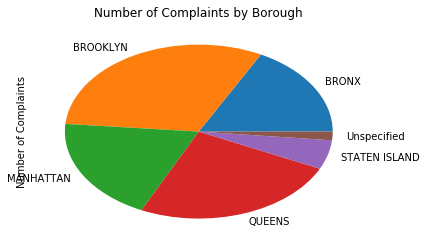

In [42]:
plt.pie(y , labels=X)
# plt.ylabel(rotation=45)
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints by Borough');

In [43]:
def complaint_types(borough_string):
    return api_df[api_df['borough'] == borough_string]['complaint_type'].value_counts().head()

In [44]:
bronx_complaints= complaint_types('BRONX')
brooklyn_complaints = complaint_types('BROOKLYN')
manhattan_complaints = complaint_types('MANHATTAN')
queens_complaints =  complaint_types('QUEENS')
staten_island_complaints = complaint_types('STATEN ISLAND')
unspecified_complaints = complaint_types('Unspecified')
complaint_variable_list = [bronx_complaints,brooklyn_complaints,
                          manhattan_complaints,queens_complaints,
                          staten_island_complaints,unspecified_complaints]

Text(0.5,1,'Unspecified')

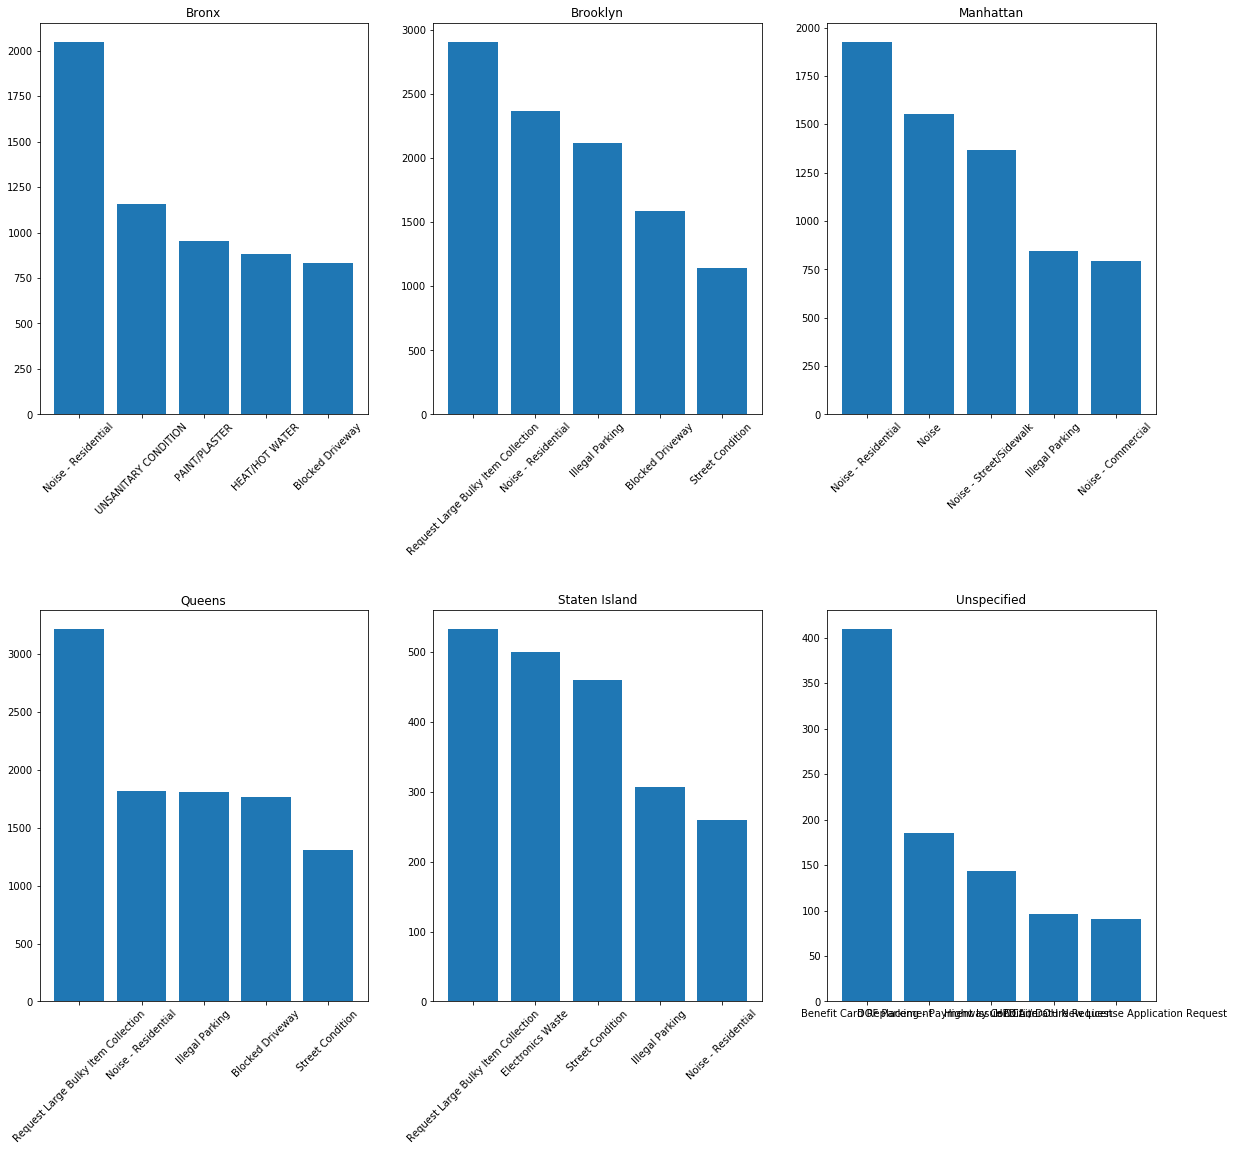

In [46]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(20,18))
f.subplots_adjust(hspace=0.5)
# for i , name in enumerate(complaint_variable_list) theres a way to do this
#     axi.bar(range(len(name)),name,tick_label=name.index)
ax1.bar(range(len(bronx_complaints)),bronx_complaints,tick_label=bronx_complaints.index)
ax1.set_title('Bronx')
for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
ax2.bar(range(len(brooklyn_complaints)),brooklyn_complaints,tick_label=brooklyn_complaints.index)
ax2.set_title('Brooklyn')
for tick in ax2.get_xticklabels():
        tick.set_rotation(45)
ax3.bar(range(len(manhattan_complaints)),manhattan_complaints,tick_label=manhattan_complaints.index)
ax3.set_title('Manhattan')
for tick in ax3.get_xticklabels():
        tick.set_rotation(45)
ax4.bar(range(len(queens_complaints)),queens_complaints,tick_label=queens_complaints.index)
ax4.set_title('Queens')
for tick in ax4.get_xticklabels():
        tick.set_rotation(45)
ax5.bar(range(len(staten_island_complaints)),staten_island_complaints,tick_label=staten_island_complaints.index)
ax5.set_title('Staten Island')
for tick in ax5.get_xticklabels():
        tick.set_rotation(45)
ax6.bar(range(len(unspecified_complaints)),unspecified_complaints,tick_label=unspecified_complaints.index)
ax6.set_title('Unspecified')
# for tick in ax6.get_xtigcklabels():
#         tick.set_rotation(10)   

# Modeling

In [40]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [37]:
y = api_df_cleaned.pop('time_till_resolution')

In [38]:
X = api_df_cleaned

In [41]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 33)

In [46]:
random_forest = RandomForestRegressor()# start out of the box
gradient_boost = GradientBoostingRegressor()

In [47]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
random_forest.score(X_test,y_test)

0.917288802268721

In [289]:
predictions = random_forest.predict(X_test)

In [50]:
RF_features = random_forest.feature_importances_

In [51]:
RF_incides = np.argsort(RF_features)[::-1]

In [52]:
RF_names = X_test.columns

In [56]:
RF_names[RF_incides][:10]
RF_features[RF_incides][:10]

array([0.52340899, 0.28980145, 0.0212678 , 0.02010064, 0.0140001 ,
       0.01348849, 0.01146704, 0.01081167, 0.00649774, 0.00573423])

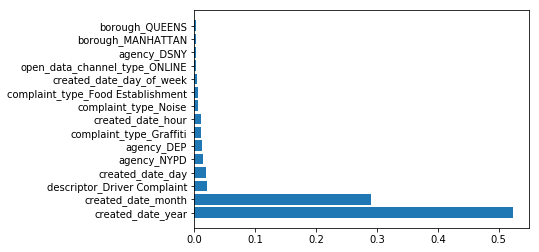

In [60]:
plt.barh(RF_names[RF_incides][:15],RF_features[RF_incides][:15]);

### Gradient Boosting

In [62]:
gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [63]:
gradient_boost.score(X_test,y_test)

0.9011631996593779

In [64]:
GB_features = gradient_boost.feature_importances_

In [65]:
GB_incides = np.argsort(GB_features)[::-1]

In [66]:
GB_names = X_test.columns

In [67]:
GB_names[GB_incides][:10]
GB_features[GB_incides][:10]

array([0.20635814, 0.171712  , 0.07227093, 0.03636306, 0.03078797,
       0.02518088, 0.02387137, 0.02043635, 0.01826371, 0.01657139])

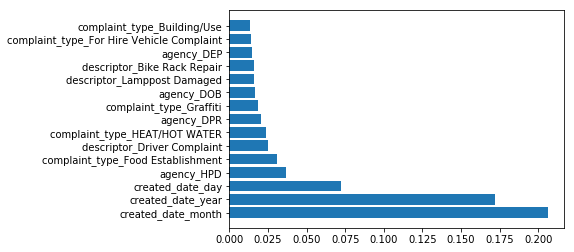

In [68]:
plt.barh(GB_names[GB_incides][:15],GB_features[GB_incides][:15]);

### Now going to look into the possible outcomes

# use NLP to determin complaint descriptor (and then assign type & agency) Extended goal

In [140]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cross_validation import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

/home/pipingkid/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [141]:
lem = WordNetLemmatizer()
training = 

SyntaxError: invalid syntax (<ipython-input-141-8fd9b6809e2b>, line 2)